In [7]:
import numpy as np
import pandas as pd
import os

import strawb
import matplotlib.pyplot as plt

# Camera in PMT1 Spec Module

Import dataframe with all clusters (including background cluster with label 0).

In [5]:
cluster1_file = 'cluster_lucifer_db/TUMPMTSPECTROMETER001_20210401T000000_20220901T000000_image_cluster_merge_npixel15.gz'

if not os.path.exists(cluster1_file):
    print("Doesn't exist")
else:
    cluster1 = pd.read_pickle(cluster1_file)  # dataframe with all clusters

Import dataframe with bioluminescent events.

In [3]:
biolum1_file = 'TUMPMTSPECTROMETER001_20210401T000000_20220901T000000_events.gz'  

if not os.path.exists(biolum1_file):
    print("Doesn't exist")
else:
    biolum1 = pd.read_pickle(biolum1_file)  # dataframe with bioluminescent events

## ----------------------------------------------------------------------------------------------------------

## Time dependence
Histograms for the total number of pictures taken, the number of pictures with bioluminescent events on them and for the probability that a picture shows at least one event.

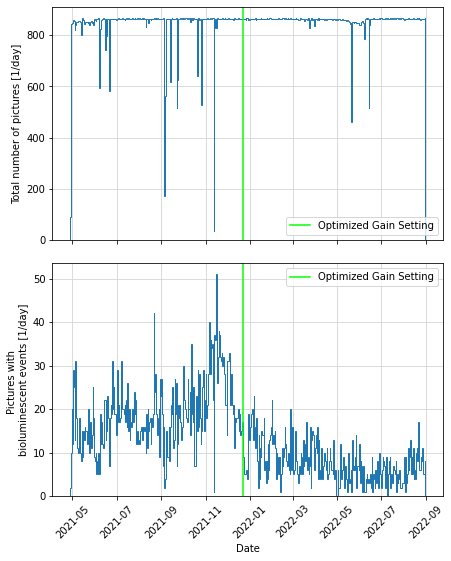

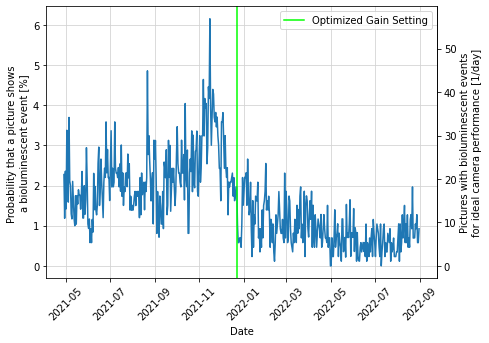

In [43]:
# define size of the bins

t_tot = pd.to_numeric(cluster1.time[~cluster1.time.isnull()]) * 1e-9 # convert to seconds

t_tot_u = np.unique(t_tot)
steps = 24*3600  # how many seconds are in one bin
t_start = t_tot_u[0] - t_tot_u[0] % steps # start the bins at midnight
t_end = t_tot_u[-1] - t_tot_u[-1] % steps + steps
bins = np.arange(t_start , t_end, steps)  # number of bins = number of days


# histogram of all pictures

counts_tot, bin_edges_tot = np.histogram(t_tot_u, bins=bins)
counts_tot = np.ma.masked_equal(counts_tot, 0)

date_edges = strawb.tools.asdatetime(bin_edges_tot)

fig, ax = plt.subplots(2, figsize=(7,9), sharex=True)

#plt.figure(figsize=(w, 3.5))
plt.sca(ax[0])
plt.xticks(rotation=45)
plt.stairs(counts_tot, date_edges)
plt.axvline(18984., color='lime', label='Optimized Gain Setting') # line indicating the date of the
                                                                 # gain optimization on 2021-12-22
plt.ylabel('Total number of pictures [1/day]')
plt.grid(color='lightgray')
plt.gca().set_axisbelow(True)
plt.legend(loc='lower right')



# histogram of pictures with animals

t = pd.to_numeric(biolum1.time[~cluster1.time.isnull()]) * 1e-9 # convert to seconds
t_u = np.unique(t)

counts, bin_edges = np.histogram(t_u, bins=bins)

#plt.figure(figsize=(w, 3.5))
plt.sca(ax[1])
plt.xticks(rotation=45)
plt.stairs(counts, date_edges)
plt.xlabel('Date')
plt.ylabel("""Pictures with 
bioluminescent events [1/day]""")
plt.axvline(18984., color='lime', label='Optimized Gain Setting')  # line indicating the date of the 
                                                                  # gain optimization on 2021-12-22
plt.grid(color='lightgray')
plt.gca().set_axisbelow(True)
plt.legend()
fig.subplots_adjust(hspace=0.1)

#plt.savefig('PMT001_total_number_and_pictures_with_animals.pdf', bbox_inches='tight')

plt.show()



p_animal = (counts/counts_tot)*100  # probability that a picture shows an animal

date = pd.to_datetime(strawb.tools.cal_middle(bin_edges)/(1e-9))

min_time = 90.54503 # minimal time needed for exposure + download 
theo_pix_min = (24*3600)/min_time  # maximal number of pictures per day


# probability that a picture shows an animal for each day

fig, ax = plt.subplots(figsize=(7,5))
plt.xticks(rotation=45)
ax.plot(date, p_animal)
plt.axvline(18984, color='lime', label='Optimized Gain Setting') # line indicating the date of the
                                                                # gain optimization on 2021-12-22

plt.xlabel('Date')
plt.ylabel("""Probability that a picture shows 
a bioluminescent event [%]""")

# number of pictures with animals per day if the camera was performing ideally and 
# there was no time needed for the download of the pictures

ax2 = ax.secondary_yaxis('right', 
                         functions = (lambda x: (x/100)* theo_pix_min * (min_time / 93.42449),
                         lambda x: (x/100)/ (theo_pix_min * (min_time / 93.42449)) ))
ax2.set_ylabel("""Pictures with bioluminescent events
for ideal camera performance [1/day]""")
plt.grid(color='lightgray')
plt.gca().set_axisbelow(True)
plt.legend()
#plt.savefig('PMT001_probability_and_number_of_pictures_ideal.pdf', bbox_inches='tight')
plt.show()

-------------------------------------------------------------------------------------------------------------

# Camera in PMT2 Spec Module

Import dataframe with all clusters (including background cluster with label 0).

In [15]:
cluster2_file = 'cluster_lucifer_db/TUMPMTSPECTROMETER002_20210401T000000_20220901T000000_image_cluster_merge_npixel15.gz'

if not os.path.exists(cluster2_file):
    print("Doesn't exist")
else:
    cluster2 = pd.read_pickle(cluster2_file)  # dataframe with all clusters

Import dataframe with bioluminescent events.

In [16]:
biolum2_file = 'TUMPMTSPECTROMETER002_20210701T000000_20220901T000000_events.gz'  

if not os.path.exists(biolum2_file):
    print("Doesn't exist")
else:
    biolum2 = pd.read_pickle(biolum2_file)  # dataframe with bioluminescent events

## ----------------------------------------------------------------------------------------------------------

## Time dependence
Histograms for the total number of pictures taken, the number of pictures with bioluminescent events on them and for the probability that a picture shows at least one event.

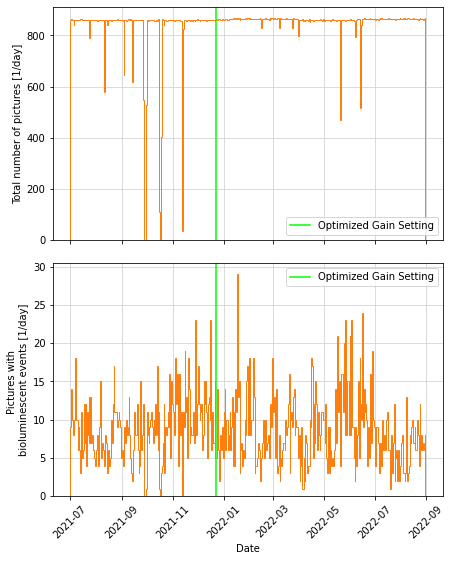

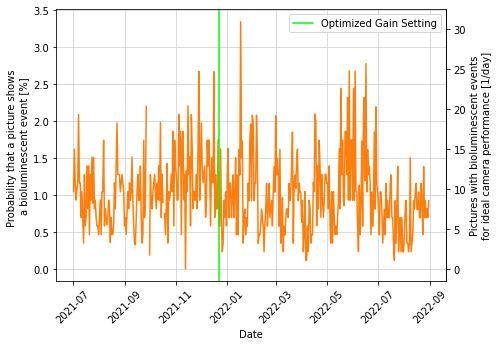

In [42]:
# define size of the bins2

t_tot2 = pd.to_numeric(cluster2[cluster2.time >= '2021-07'].time[~cluster2.time.isnull()]) * 1e-9 # convert to seconds

t_tot2_u = np.unique(t_tot2)
steps = 24*3600  # how many seconds are in one bin
t_start2 = t_tot2_u[0] - t_tot2_u[0] % steps # start the bins2 at midnight
t_end2 = t_tot2_u[-1] - t_tot2_u[-1] % steps + steps
bins2 = np.arange(t_start2 , t_end2, steps)  # number of bins2 = number of days


# histogram of all pictures

counts_tot2, bin_edges_tot2 = np.histogram(t_tot2_u, bins=bins2)
counts_tot2 = np.ma.masked_equal(counts_tot2, 0)

date_edges2 = strawb.tools.asdatetime(bin_edges_tot2)

fig, ax = plt.subplots(2, figsize=(7,9), sharex=True)

#plt.figure(figsize=(w, 3.5))
plt.sca(ax[0])
plt.xticks(rotation=45)
plt.stairs(counts_tot2, date_edges2, color='tab:orange')
plt.axvline(18984., color='lime', label='Optimized Gain Setting') # line indicating the date2 of the
                                                                 # gain optimization on 2021-12-22
plt.ylabel('Total number of pictures [1/day]')
plt.grid(color='lightgray')
plt.gca().set_axisbelow(True)
plt.legend(loc='lower right')



# histogram of pictures with animals

t2 = pd.to_numeric(biolum2.time[~cluster2.time.isnull()]) * 1e-9 # convert to seconds
t2_u = np.unique(t2)

counts2, bin_edges2 = np.histogram(t2_u, bins=bins2)

#plt.figure(figsize=(w, 3.5))
plt.sca(ax[1])
plt.xticks(rotation=45)
plt.stairs(counts2, date_edges2, color='tab:orange')
plt.xlabel('Date')
plt.ylabel("""Pictures with 
bioluminescent events [1/day]""")
plt.axvline(18984., color='lime', label='Optimized Gain Setting')  # line indicating the date2 of the 
                                                                  # gain optimization on 2021-12-22
plt.grid(color='lightgray')
plt.gca().set_axisbelow(True)
plt.legend()
fig.subplots_adjust(hspace=0.1)

plt.savefig('PMT001_total_number_and_pictures_with_animals.pdf', bbox_inches='tight')

plt.show()



p_animal2 = (counts2/counts_tot2)*100  # probability that a picture shows an animal

date2 = pd.to_datetime(strawb.tools.cal_middle(bin_edges2)/(1e-9))

min_time = 90.54503 # minimal time needed for exposure + download 
theo_pix_min = (24*3600)/min_time  # maximal number of pictures per day


# probability that a picture shows an animal for each day

fig, ax = plt.subplots(figsize=(7,5))
plt.xticks(rotation=45)
ax.plot(date2, p_animal2, color='tab:orange')
plt.axvline(18984, color='lime', label='Optimized Gain Setting') # line indicating the date2 of the
                                                                # gain optimization on 2021-12-22

plt.xlabel('Date')
plt.ylabel("""Probability that a picture shows 
a bioluminescent event [%]""")

# number of pictures with animals per day if the camera was performing ideally and 
# there was no time needed for the download of the pictures

ax2 = ax.secondary_yaxis('right', 
                         functions = (lambda x: (x/100)* theo_pix_min * (min_time / 93.42449),
                         lambda x: (x/100)/ (theo_pix_min * (min_time / 93.42449)) ))
ax2.set_ylabel("""Pictures with bioluminescent events
for ideal camera performance [1/day]""")
plt.grid(color='lightgray')
plt.gca().set_axisbelow(True)
plt.legend()
#plt.savefig('PMT001_probability_and_number_of_pictures_ideal.pdf', bbox_inches='tight')
plt.show()

-------------------------------------------------------------------------------------------------------------

# Time dependence for both Cameras in one Plot

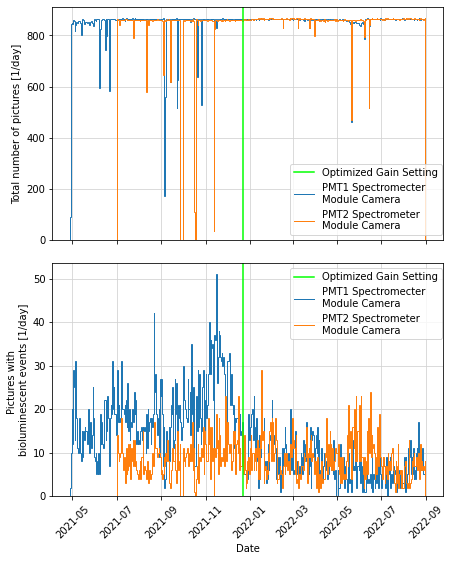

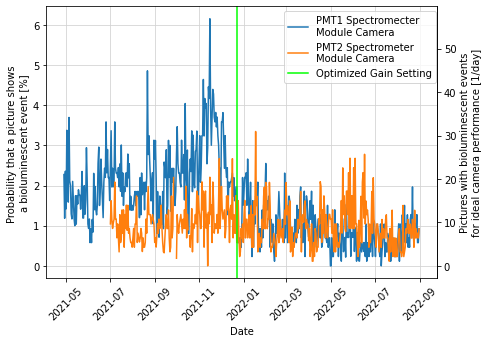

In [41]:
### PLOT
# histogram of all pictures

fig, ax = plt.subplots(2, figsize=(7, 9), sharex=True)

plt.sca(ax[0])
plt.xticks(rotation=45)
plt.stairs(counts_tot, date_edges, label='PMT1 Spectromecter \nModule Camera')
plt.stairs(counts_tot2, date_edges2, label='PMT2 Spectrometer \nModule Camera')
plt.axvline(18984., color='lime', label='Optimized Gain Setting')
plt.ylabel('Total number of pictures [1/day]')
plt.legend(bbox_to_anchor=(1.01, 0), loc='lower right')
plt.grid(color='lightgray')
plt.gca().set_axisbelow(True)



# histogram of pictures with animals

plt.sca(ax[1])
plt.xticks(rotation=45)
plt.stairs(counts, date_edges, label='PMT1 Spectromecter \nModule Camera')
plt.stairs(counts2, date_edges2, label='PMT2 Spectrometer \nModule Camera')
plt.axvline(18984., color='lime', label='Optimized Gain Setting')
plt.xlabel('Date')
plt.ylabel("""Pictures with 
bioluminescent events [1/day]""")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper right')
plt.grid(color='lightgray')
plt.gca().set_axisbelow(True)
fig.subplots_adjust(hspace=0.1)

#plt.savefig('PMT001_and_PMT002_total_number_of_pictures_and_with_animals.pdf', bbox_inches='tight')

plt.show()



# probability that a picture shows an animal for each day

fig, ax = plt.subplots(figsize=(7,5))
plt.xticks(rotation=45)
ax.plot(date, p_animal, label='PMT1 Spectromecter \nModule Camera')
ax.plot(date2, p_animal2, label='PMT2 Spectrometer \nModule Camera')
plt.axvline(18984., color='lime', label='Optimized Gain Setting')
plt.xlabel('Date')
plt.ylabel("""Probability that a picture shows 
a bioluminescent event [%]""")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper right')

# number of pictures with animals per day if the camera was performing ideally and 
# there was no time needed for the download of the pictures

ax2 = ax.secondary_yaxis('right', 
                         functions = (lambda x: (x/100)* theo_pix_min * (min_time / 93.42449),
                         lambda x: (x/100)/ (theo_pix_min * (min_time / 93.42449)) ))
ax2.set_ylabel("""Pictures with bioluminescent events
for ideal camera performance [1/day]""")
plt.grid(color='lightgray')
plt.gca().set_axisbelow(True)
#plt.savefig('PMT001_and_PMT002_probability_and_number_of_pictures_ideal.pdf', bbox_inches='tight')
plt.show()